# Notebook I

**Preprocessing and Exploration**

This notebook serves prepare the data prior to training. Briefly speaking, the following four steps will be conducted.

1. Unzip data and randomly isolate a validation set from the training data
2. Illustrate a small sample of the data
3. Install ImbalancedDatasetSampler
4. CenterCrop all data into square-shaped images (height = width)

## Mount to Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd "/content/gdrive/My Drive/Projects/Pneumonia_X_Ray/"

/content/gdrive/My Drive/Projects/Pneumonia_X_Ray


## Unzip the data

In [0]:
!unzip chest-xray-pneumonia.zip

### Check package versions

In [0]:
import sys
print(sys.path)

['/tensorflow-1.15.0/python3.6', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


### Move a random sample of training data to validation data

In [0]:
import os
import shutil
import numpy as np

In [0]:
temp = np.random.randint(0, 32, 20)

In [0]:
np.random.choice(temp, 5)

array([28, 30, 15, 12,  9])

In [0]:
label = 'NORMAL'

trainPath = 'data/chest_xray/train/' + label
valPath = 'data/chest_xray/val/' + label

numFiles = 32
trainNames = np.array(os.listdir(trainPath))
# Randomly sample numFiles files from trainNames
filesToMove = np.random.choice(trainNames, numFiles)
# Move to validation data
for name in filesToMove:
  shutil.move(os.path.join(trainPath, name), valPath)

Error: ignored

In [0]:
label = 'PNEUMONIA'

trainPath = 'data/chest_xray/train/' + label
valPath = 'data/chest_xray/val/' + label

numFiles = 32
trainNames = np.array(os.listdir(trainPath))
# Randomly sample numFiles files from trainNames
filesToMove = np.random.choice(trainNames, numFiles)
# Move to validation data
for name in filesToMove:
  shutil.move(os.path.join(trainPath, name), valPath)

## A peek at the data

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from PIL import Image

In [0]:
%pwd

'/content/gdrive/My Drive/Projects/Pneumonia_X_Ray'

In [0]:
sampleFiles = os.listdir(os.path.join(dataPath, samplePath))
sampleFiles = list(filter(lambda x: x.endswith('.jpeg'), sampleFiles))

### Display the first 10 images with pneumonia

In [0]:
img.shape

(755, 1056)

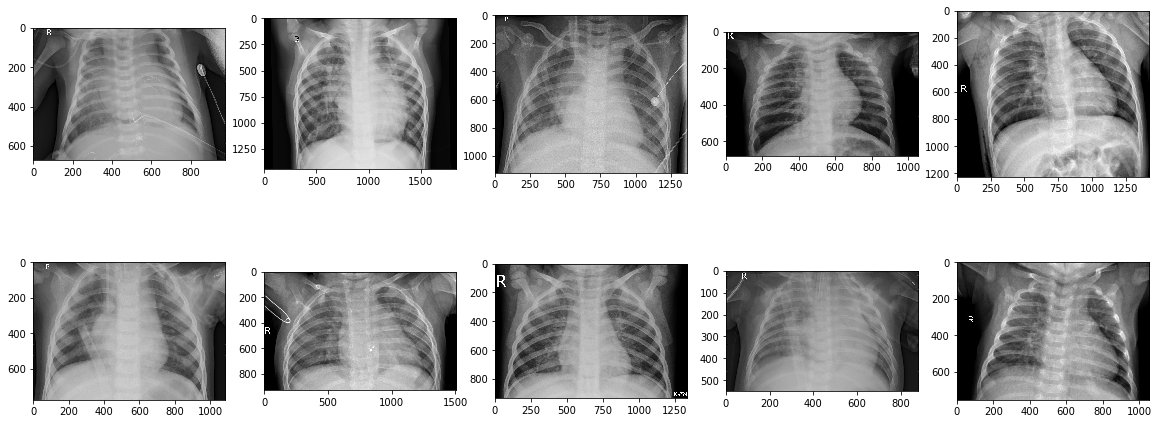

In [0]:
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i in range(10):
  ax = axes[i // 5][i % 5]
  imgPath = os.path.join(dataPath, samplePath, sampleFiles[i])
  img = mpimg.imread(imgPath, format='jpeg').astype(float)
  ax.imshow(img, cmap='gray')


## Install ImbalancedDatasetSampler

In [0]:
%cd "/content/gdrive/My Drive/Projects/Pneumonia_X_Ray/code"

/content/gdrive/My Drive/Projects/Pneumonia_X_Ray/code


In [0]:
!git clone https://github.com/ufoym/imbalanced-dataset-sampler.git

Cloning into 'imbalanced-dataset-sampler'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 30 (delta 0), reused 5 (delta 0), pack-reused 18
Unpacking objects: 100% (30/30), done.


In [0]:
%cd "/content/gdrive/My Drive/Projects/Pneumonia_X_Ray/code/imbalanced-dataset-sampler"


/content/gdrive/My Drive/Projects/Pneumonia_X_Ray/code/imbalanced-dataset-sampler


In [0]:
!python setup.py install

Partial import during the build process.
running install
running bdist_egg
running egg_info
creating torchsampler.egg-info
writing torchsampler.egg-info/PKG-INFO
writing dependency_links to torchsampler.egg-info/dependency_links.txt
writing requirements to torchsampler.egg-info/requires.txt
writing top-level names to torchsampler.egg-info/top_level.txt
writing manifest file 'torchsampler.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
no previously-included directories found matching '.github'
no previously-included directories found matching 'temp*'
no previously-included directories found matching 'test*'
writing manifest file 'torchsampler.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/torchsampler
copying torchsampler/__init__.py -> build/lib/torchsampler
copying torchsampler/imbalanced.py -> build/lib/torchsampler
creating build/bdist.linux-x86_64


In [0]:
from torchsampler import ImbalancedDatasetSampler

## Center Crop the Images

The raw images come in at various dimensions. Nevertheless, it would be handy to convert them into square images. Hence, for each image, we will crop at the center without any resizing and save the square image in a separate directory called "chest_xray_cropped."

In [0]:
# Change current directory to data
%cd data

/content/gdrive/My Drive/Projects/Pneumonia_X_Ray/data


### Define a function that center crops an image

In [0]:
def getCroppedImage(img):
  h, w = img.shape
  if h < w:
    w1 = int(w / 2 - h / 2)
    w2 = int(w / 2 + h / 2)
    img_cropped = img[:, w1:w2]
  else:
    h1 = int(h / 2 - w / 2)
    h2 = int(h / 2 + w / 2)
    img_cropped = img[h1:h2, :]
  return img_cropped

In [0]:
import cv2
from google.colab.patches import cv2_imshow

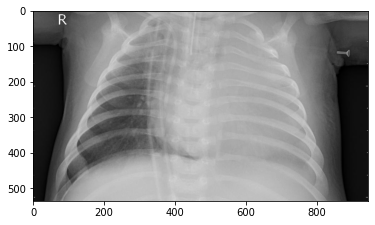

In [0]:
# Test
temp_file = 'chest_xray/test/PNEUMONIA/person141_bacteria_670.jpeg'

img = mpimg.imread(temp_file)
plt.imshow(img, cmap='gray')

In [0]:
img.shape

(536, 944)

In [0]:
img_cropped = getCroppedImage(img)

In [0]:
img_cropped.shape

(536, 536)

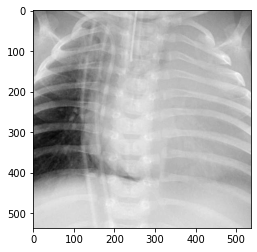

In [0]:
plt.imshow(img_cropped, cmap='gray')

In [0]:
plt.imsave('test.jpeg', img, cmap='gray')

### Perform center cropping to all data

In [0]:
from tqdm import tqdm

listOfDirectories = ['train/PNEUMONIA/',
                     'train/NORMAL',
                     'val/PNEUMONIA',
                     'val/NORMAL',
                     'test/PNEUMONIA',
                     'test/NORMAL']

for directory in listOfDirectories:
  print('Traversing {}'.format(directory))
  files = os.listdir(os.path.join('chest_xray', directory))
  files = list(filter(lambda x: x.endswith('.jpeg'), files))
  for f in tqdm(files):
    try:
      img = mpimg.imread(os.path.join('chest_xray', directory, f))
      if len(img.shape) == 3:
        img = img[:, :, 0]
    except:
      print('Unable to read {}'.format(f))
      continue
    imgCropped = getCroppedImage(img)
    mpimg.imsave(os.path.join('chest_xray_cropped', directory, f), imgCropped, cmap='gray')


  0%|          | 0/3843 [00:00<?, ?it/s]

Traversing train/PNEUMONIA/



100%|██████████| 3843/3843 [40:50<00:00,  1.57it/s]


Traversing train/NORMAL



100%|██████████| 1312/1312 [09:35<00:00,  2.28it/s]


Traversing val/PNEUMONIA



100%|██████████| 40/40 [00:12<00:00,  3.26it/s]


Traversing val/NORMAL



100%|██████████| 37/37 [00:16<00:00,  2.30it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

Traversing test/PNEUMONIA



100%|██████████| 390/390 [02:22<00:00,  2.73it/s]


Traversing test/NORMAL



100%|██████████| 234/234 [01:42<00:00,  2.28it/s]


**End of notebook**